In [1]:
# Wrangling
import pandas as pd

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Modeling
import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

In [2]:
path = '~/desktop/codeup_work/regression/'
df = pd.read_csv(path + "student_grades.csv")

# we will create a melted version of train for visualization purposes
df_melted = pd.melt(df, id_vars=['student_id'], value_vars=['exam1','exam2','exam3','final_grade'], 
                    var_name='grade_type', value_name='score')

X = df.drop(['final_grade','student_id'], axis=1)
y = df[['final_grade']]

# random_state=0 tells the sklearn function that you are not setting a seed
# if you want to be able to duplicate results, set random_state to a positive integer
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=0)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [3]:
X_train.head(3)

,exam1,exam2,exam3
68,83,80,86
3,83,80,86
74,62,70,79


In [4]:
y_train.head(3)

,final_grade
68,85
3,85
74,70


In [5]:
train.head(3)

,exam1,exam2,exam3,final_grade
68,83,80,86,85
3,83,80,86,85
74,62,70,79,70


In [6]:
df.head(3)

,student_id,exam1,exam2,exam3,final_grade
0,1,100,90,95,96
1,2,98,93,96,95
2,3,85,83,87,87


# Exercises:
1. Using the example data above:

    a. Extract information from the results of .describe and compute IQR and range of each exam and the final grade

In [7]:
IQR = df.describe().quantile(.75) - df.describe().quantile(.25)
IQR

student_id     55.375345
exam1          27.250000
exam2          21.250000
exam3          18.500000
final_grade    23.750000
dtype: float64

In [8]:
range = df.describe().max() - df.describe().min()
range

student_id     103.000000
exam1           89.715156
exam2           93.704297
exam3           95.285801
final_grade     93.081878
dtype: float64

    b. Write a for loop to plot each of the 3 features (exam 1, 2, & 3) with the final grade using a joint plot. What can you say about each relationship (using pearson's r and the p-value)

In [9]:
# this didn't work right
# plt.figure(figsize=(16, 10))

# with sns.axes_style('white'):
#     for i, col in enumerate(['exam1', 'exam2', 'exam3']):  
#         plot_number = i + 1 # i starts at 0, but plot nos should start at 1
#         series = df[col]  
#         plt.subplot(2, 2, plot_number)
#         plt.title(col)
#         j = sns.jointplot(col, "final_grade", data=train, kind='reg', height=5);
#         j.annotate(stats.pearsonr)
# plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWa

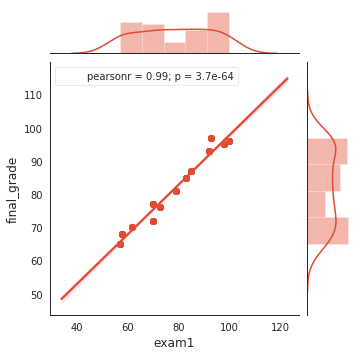

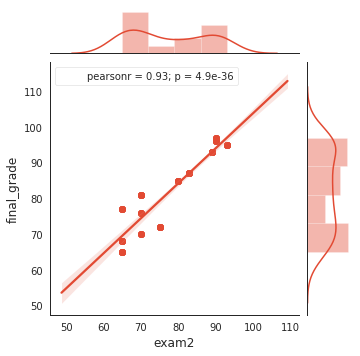

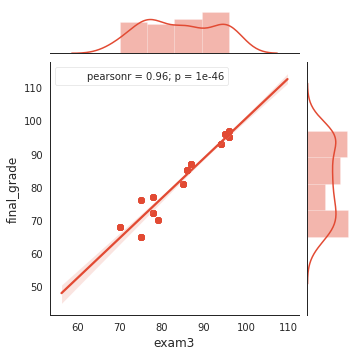

In [10]:
with sns.axes_style('white'):
    for i, col in enumerate(['exam1', 'exam2', 'exam3']):
        j = sns.jointplot(col, "final_grade", data=train, kind='reg', height=5);
        j.annotate(stats.pearsonr)
plt.show()

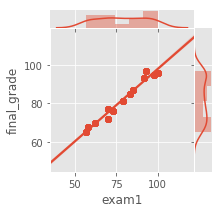

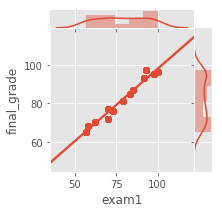

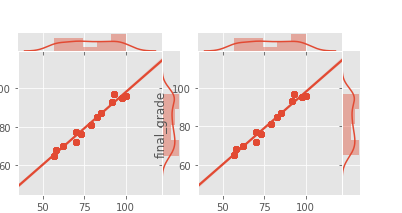

In [11]:
# trying to print them side by side
JG1 = sns.jointplot('exam1', 'final_grade', data=df, kind='reg', height=5)
JG2 = sns.jointplot('exam1', 'final_grade', data=df, kind='reg', height=5)

#subplots.migration
f = plt.figure()
for J in [JG1, JG2]:
    for A in J.fig.axes:
        f._axstack.add(f._make_key(A), A)
#subplots size adjustment
f.axes[0].set_position([0.05, 0.05, 0.4,  0.4])
f.axes[1].set_position([0.05, 0.45, 0.4,  0.05])
f.axes[2].set_position([0.45, 0.05, 0.05, 0.4])
f.axes[3].set_position([0.55, 0.05, 0.4,  0.4])
f.axes[4].set_position([0.55, 0.45, 0.4,  0.05])
f.axes[5].set_position([0.95, 0.05, 0.05, 0.4])

    c. Find a way to plot the boxplot & heatmap from section 6 side by side.

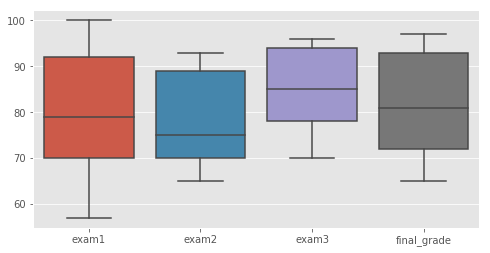

In [12]:
plt.figure(figsize=(8,4))
sns.boxplot(data=train)

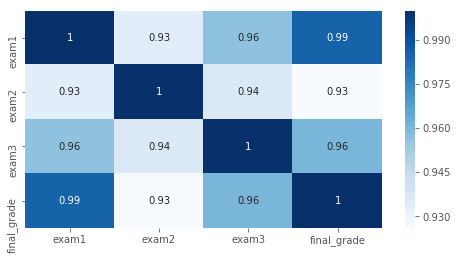

In [13]:
plt.figure(figsize=(8,4))
sns.heatmap(train.corr(), cmap='Blues', annot=True)

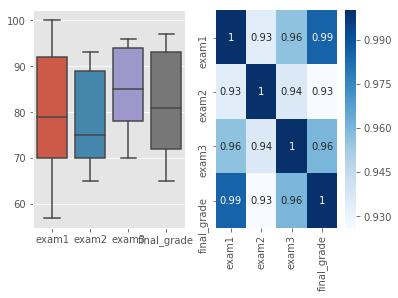

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2)
# plt.figure(figsize=(8,4))  # not working
sns.boxplot(data=train, ax=ax1)
sns.heatmap(train.corr(), cmap='Blues', annot=True, ax=ax2)
plt.show()

    d. What are your take-aways from the evaluation results of lm1 and lm2?

The mse of lm2 was better probably because it has another strong variable, a better selection of variables.

    e. Fit, predict, and evaluate one more model, lm3, using exam 3 only.

# lm3

In [15]:
lm3 = LinearRegression()
print(lm3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [16]:
lm3.fit(X_train[['exam3']], y_train)
print(lm3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [17]:
lm3_y_intercept = lm3.intercept_
print(lm3_y_intercept)

[-19.62667326]


In [18]:
lm3_coefficients = lm3.coef_
print(lm3_coefficients)

[[1.20315159]]


In [19]:
print('Univariate - final_exam = b + m * exam3')
print('    y-intercept  (b): %.2f' % lm3_y_intercept)
print('    coefficient (m): %.2f' % lm3_coefficients[0][0])

Univariate - final_exam = b + m * exam3
    y-intercept  (b): -19.63
    coefficient (m): 1.20


In [20]:
X_train.head()

,exam1,exam2,exam3
68,83,80,86
3,83,80,86
74,62,70,79
82,93,90,96
75,58,65,70


In [21]:
y_pred_lm3 = lm3.predict(X_train.drop(columns=['exam1','exam2']))

In [22]:
#X_train.drop(columns=['exam1','exam2']) is the same as...
X_train[['exam3']].head(3)

,exam3
68,86
3,86
74,79


In [23]:
mse_lm3 = mean_squared_error(y_train, y_pred_lm3)
print("lm3\n  mse: {:.3}".format(mse_lm3)) 

lm3
  mse: 9.08


In [24]:
r2_lm3 = r2_score(y_train, y_pred_lm3)
print('  {:.2%} of the variance in the student''s final grade can be explained by the grades on exam 3.'.format(r2_lm3))

  92.24% of the variance in the students final grade can be explained by the grades on exam 3.


    f. How does the result of the model compare to the other two? Which should you use, based on these results?

lm1's mse is 3.37, r-squared is .9712

lm2's mse is 2.94, r-squared is .9749

lm3's mse is 9.08, r-squared is .9224

The third model is a much worse predictor. It's mse is way higher and the r-squared is lower.

    g. Predict final grades of the out-of-sample data (test dataframe) and evaluate results.

In [25]:
# Make predictions using the testing set
y_pred_lm3 = lm3.predict(X_test[['exam3']])

In [26]:
mse_lm3 = mean_squared_error(y_test, y_pred_lm3)

print("Mean squared error for lm3: %.2f" % mse_lm3)

Mean squared error for lm3: 12.14


In [27]:
r2_lm3 = r2_score(y_test, y_pred_lm3)

print('{:.2%} of the variance in the student''s final grade can be explained by the grades on the exam 3.'
      .format(r2_lm3))

90.07% of the variance in the students final grade can be explained by the grades on the exam 3.


Text(0, 0.5, 'Residuals')

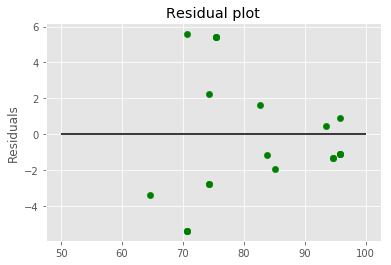

In [28]:
plt.scatter(y_pred_lm3, y_pred_lm3 - y_test, c='g', s=40)
plt.hlines(y=0, xmin=50, xmax=100)
plt.title("Residual plot")
plt.ylabel('Residuals')

lm1's mse is 3.37, r-squared is .9712

lm2's mse is 2.94, r-squared is .9749

lm3's mse is 9.08, r-squared is .9224

The third model is a much worse predictor. It's mse is way higher and the r-squared is lower.

On the test data, 
lm3's mse is 12.14, r-squared is .9007

Which looks even worse.

    h. Which model performs the best, based on the 2 out-of-sample evaluation results (the example one, lm1, and the exercise one, lm3, from the above exercise).

# lm1

In [29]:
lm1 = LinearRegression()
print(lm1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [30]:
lm1.fit(X_train[['exam1']], y_train)
print(lm1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [31]:
lm1_y_intercept = lm1.intercept_
print(lm1_y_intercept)

[22.88211318]


In [32]:
lm1_coefficients = lm1.coef_
print(lm1_coefficients)

[[0.74850854]]


In [33]:
print('Univariate - final_exam = b + m * exam1')
print('    y-intercept  (b): %.2f' % lm1_y_intercept)
print('    coefficient (m): %.2f' % lm1_coefficients[0][0])

Univariate - final_exam = b + m * exam1
    y-intercept  (b): 22.88
    coefficient (m): 0.75


In [34]:
y_pred_lm1 = lm1.predict(X_train.drop(columns=['exam2', 'exam3']))

In [35]:
mse_lm1 = mean_squared_error(y_train, y_pred_lm1)
print("lm1\n  mse: {:.3}".format(mse_lm1)) 

lm1
  mse: 3.37


In [36]:
r2_lm1 = r2_score(y_train, y_pred_lm1)
print('  {:.2%} of the variance in the student''s final grade can be explained by the grades on exam 1.'.format(r2_lm1))

  97.12% of the variance in the students final grade can be explained by the grades on exam 1.


In [37]:
# Make predictions using the testing set
y_pred_lm1 = lm1.predict(X_test[['exam1']])

In [38]:
mse_lm1 = mean_squared_error(y_test, y_pred_lm1)

print("Mean squared error for lm1: %.2f" % mse_lm1)

Mean squared error for lm1: 4.75


In [39]:
r2_lm1 = r2_score(y_test, y_pred_lm1)

print('{:.2%} of the variance in the student''s final grade can be explained by the grades on the exam 1.'
      .format(r2_lm1))

96.12% of the variance in the students final grade can be explained by the grades on the exam 1.


Text(0, 0.5, 'Residuals')

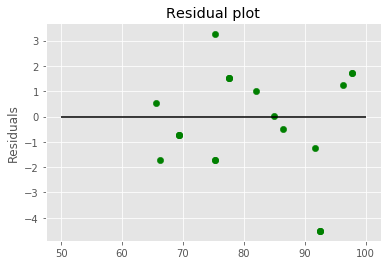

In [40]:
plt.scatter(y_pred_lm1, y_pred_lm1 - y_test, c='g', s=40)
plt.hlines(y=0, xmin=50, xmax=100)
plt.title("Residual plot")
plt.ylabel('Residuals')

# lm2

In [41]:
lm2 = LinearRegression()
print(lm2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [42]:
lm2.fit(X_train[['exam1', 'exam3']], y_train)
print(lm2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [43]:
lm2_y_intercept = lm2.intercept_
print(lm2_y_intercept)

[12.79518052]


In [44]:
lm2_coefficients = lm2.coef_
print(lm2_coefficients)

[[0.59709165 0.26106586]]


In [45]:
print('Multivariate - final_exam = b + m1 * exam1 + m2 * exam3')
print('    y-intercept  (b): %.2f' % lm2_y_intercept)
print('    coefficient (m1): %.2f' % lm2_coefficients[0][0])
print('    coefficient (m2): %.2f' % lm2_coefficients[0][1])

Multivariate - final_exam = b + m1 * exam1 + m2 * exam3
    y-intercept  (b): 12.80
    coefficient (m1): 0.60
    coefficient (m2): 0.26


In [46]:
y_pred_lm2 = lm2.predict(X_train.drop(columns=['exam2']))

In [47]:
mse_lm2 = mean_squared_error(y_train, y_pred_lm2)
print("lm2\n  mse: {:.3}".format(mse_lm2)) 

lm2
  mse: 2.94


In [48]:
r2_lm2 = r2_score(y_train, y_pred_lm2)
print('  {:.2%} of the variance in the student''s final grade can be explained by the grades on exam 1 and 3.'.format(r2_lm2))

  97.49% of the variance in the students final grade can be explained by the grades on exam 1 and 3.


In [49]:
# Make predictions using the testing set
y_pred_lm2 = lm2.predict(X_test[['exam1', 'exam3']])

In [50]:
mse_lm2 = mean_squared_error(y_test, y_pred_lm2)

print("Mean squared error: %.2f" % mse_lm2)

Mean squared error: 3.42


In [51]:
r2_lm2 = r2_score(y_test, y_pred_lm2)

print('{:.2%} of the variance in the student''s final grade can be explained by the grades on the first 3 exams.'
      .format(r2_lm2))

97.20% of the variance in the students final grade can be explained by the grades on the first 3 exams.


Text(0, 0.5, 'Residuals')

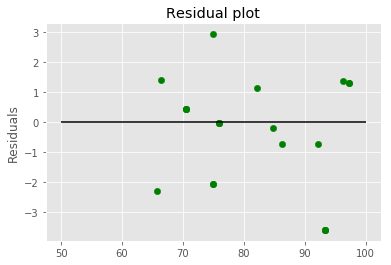

In [52]:
plt.scatter(y_pred_lm2, y_pred_lm2 - y_test, c='g', s=40)
plt.hlines(y=0, xmin=50, xmax=100)
plt.title("Residual plot")
plt.ylabel('Residuals')

h. Which model performs the best, based on the 2 out-of-sample evaluation results (the example one, lm1, and the exercise one, lm3, from the above exercise).

In [53]:
print('On the test data:')
print('mse_lm1 = ', mse_lm1, ' r2_lm1 = ', r2_lm1)
print('mse_lm2 = ', mse_lm2, ' r2_lm2 = ', r2_lm2)
print('mse_lm3 = ', mse_lm3, ' r2_lm3 = ', r2_lm3)

On the test data:
mse_lm1 =  4.745984061548995  r2_lm1 =  0.9611735433691406
mse_lm2 =  3.421946649723411  r2_lm2 =  0.9720053709693165
mse_lm3 =  12.141629482949778  r2_lm3 =  0.9006704522320177


Module lm2 has the smallest mse which is a measure of error. It also has the highest r-squared of the three models. R-squared is the fraction of the total variation in the dependent variables that is captured by the model. 

2. Using telco_churn database, predict total charges

    a. Using the telco_churn database, extract a table for each customer with a 2-year contract and include the following information customer id, tenure, monthly charges, and total charges.

    b. Export the table to a csv

    c. Create a jupyter notebook titled regression

    d. Prepare the Environment (do not copy and paste...manually type so that you remember what you need and why you are importing the things that you are. You will do this often!)

In [54]:
# # ignore warnings
# import warnings
# warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

#Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Modeling
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy.stats import iqr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

    e. Read the information from the customers table into a dataframe.
    

In [55]:
path = '~/desktop/codeup_work/regression/'
tc2_df = pd.read_csv(path + "telo_churn_2_years.csv")

In [56]:
tc2_df.head(3)

,customer_id,tenure,monthly_charges,total_charges
0,0013-SMEOE,71,109.70,7904.25
1,0014-BMAQU,63,84.65,5377.8
2,0016-QLJIS,65,90.45,5957.9


    f. How many rows are in your dataframe? 1,695

In [57]:
tc2_df.shape[0] #shows just the rows

1695

    g. What is the data type of the field containing the customer ids? object

In [58]:
tc2_df['customer_id'].dtype

dtype('O')

In [59]:
tc2_df.dtypes

customer_id         object
tenure               int64
monthly_charges    float64
total_charges       object
dtype: object

    h. Print to the notebook the last 10 rows of your dataframe.

In [60]:
tc2_df.tail(10)

,customer_id,tenure,monthly_charges,total_charges
1685,9945-PSVIP,25,18.70,383.65
1686,9950-MTGYX,28,20.30,487.95
1687,9953-ZMKSM,63,25.25,1559.3
1688,9958-MEKUC,72,103.95,7517.7
1689,9959-WOFKT,71,106.70,7382.25
1690,9964-WBQDJ,71,24.40,1725.4
1691,9972-EWRJS,67,19.25,1372.9
1692,9975-GPKZU,46,19.75,856.5
1693,9993-LHIEB,67,67.85,4627.65
1694,9995-HOTOH,63,59.00,3707.6


    i. What is the inner quartile range of tenure? monthly charges? total charges?

Have to find total charges later after data is cleaned...

In [61]:
IQR_tenure = tc2_df.tenure.quantile(.75) - tc2_df.tenure.quantile(.25)
IQR_monthly_charges = tc2_df.monthly_charges.quantile(.75) - tc2_df.monthly_charges.quantile(.25)
IQR_tenure, IQR_monthly_charges

(23.0, 66.42500000000001)

In [62]:
from scipy.stats import iqr
iqr(tc2_df.tenure), iqr(tc2_df.monthly_charges)

(23.0, 66.42500000000001)

    j. How many missing values are in each variable?

In [63]:
tc2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
customer_id        1695 non-null object
tenure             1695 non-null int64
monthly_charges    1695 non-null float64
total_charges      1695 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 53.0+ KB


In [64]:
tc2_df.isnull().sum()

customer_id        0
tenure             0
monthly_charges    0
total_charges      0
dtype: int64

In [65]:
# tc2_df.total_charges.str.isdigit().sum() #this only counts 82 integers because the . are strings

In [66]:
tc2_df.sort_values(by=['total_charges'], ascending=True).head(11)

,customer_id,tenure,monthly_charges,total_charges
524,3213-VVOLG,0,25.35,
416,2520-SGTTA,0,20.00,
678,4075-WKNIU,0,73.35,
234,1371-DWPAZ,0,56.05,
941,5709-LVOEQ,0,80.85,
453,2775-SEFEE,0,61.90,
505,3115-CZMZD,0,20.25,
1293,7644-OMVMY,0,19.85,
726,4472-LVYGI,0,52.55,
716,4367-NUYAO,0,25.75,


In [67]:
list(tc2_df.columns.values)

['customer_id', 'tenure', 'monthly_charges', 'total_charges']

    k. Fill any missing values with 0.

In [68]:
tc2_df.replace('',0,inplace=True)
tc2_df.fillna(0,inplace=True)

In [69]:
(tc2_df.total_charges==' ').sum()

10

In [70]:
tc2_df.total_charges.replace(' ', tc2_df['tenure']*tc2_df['monthly_charges'], inplace=True)

In [71]:
(tc2_df.total_charges==' ').sum()

0

In [72]:
tc2_df['total_charges'] = pd.to_numeric(tc2_df['total_charges']) # errors='coerce'

In [73]:
pd.isna(tc2_df.total_charges).sum()

0

In [74]:
tc2_df['tenure'] = pd.to_numeric(tc2_df['tenure'])
tc2_df['monthly_charges'] = pd.to_numeric(tc2_df['monthly_charges'])
tc2_df['tenure'] = tc2_df['tenure'].astype(float)
tc2_df.dtypes

customer_id         object
tenure             float64
monthly_charges    float64
total_charges      float64
dtype: object

In [75]:
tenure_IQR = tc2_df.tenure.quantile(.75) - tc2_df.tenure.quantile(.25)
monthly_charges_IQR = tc2_df.monthly_charges.quantile(.75) - tc2_df.monthly_charges.quantile(.25)
total_charges_IQR = tc2_df.total_charges.quantile(.75) - tc2_df.total_charges.quantile(.25)

tenure_IQR, monthly_charges_IQR, total_charges_IQR

(23.0, 66.42500000000001, 4719.125)

In [76]:
iqr(tc2_df.tenure), iqr(tc2_df.monthly_charges), iqr(tc2_df.total_charges)

(23.0, 66.42500000000001, 4719.125)

In [77]:
# # This code would be good if I have a lot of columns that I want to batch 
# # process. However, it will just skip any columns it cannot convert to 
# # integers. Though running this one took care of the erros that I had to 
# # coerce in the previous block of code.

# # Fill all empty cells with a 0 and, where possible, 
# # convert the numerical values that are strings to integers.

# def recode_empty_cells(dataframe, list_of_columns):

#     # Fill all empty cells with a 0
#     for column in list_of_columns:
#         dataframe[column] = dataframe[column].replace(r'\s+', 0, regex=True)

#     return dataframe

# def change_string_to_int(dataframe, list_of_columns):

#     dataframe = recode_empty_cells(dataframe, list_of_columns)

#     # where possible, convert the numerical values that are strings to integers
#     for column in list_of_columns:
#         try:
#             dataframe[column] = dataframe[column].astype(int)
#         except ValueError:
#             pass

#     return dataframe

# change_string_to_int(tc2_df, list(tc2_df.columns.values))
# tc2_df

    l. Show the distribution of monthly charges through a histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1ca44ac8>]],
      dtype=object)

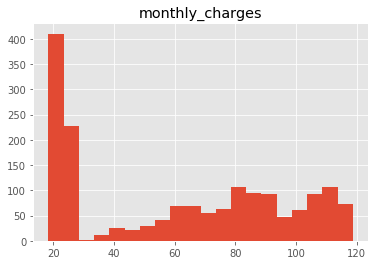

In [78]:
tc2_df[['monthly_charges']].hist(bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1c8cbd30>]],
      dtype=object)

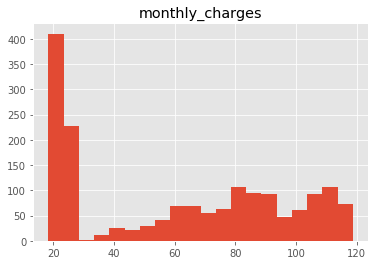

In [79]:
tc2_df.hist(column='monthly_charges', bins=20)

    m. Create a new dataframe that contains tenure, monthly charges, and total charges, but not the customer id.

In [80]:
no_id_df = tc2_df.drop(columns=['customer_id'])
no_id_df.head(3)

,tenure,monthly_charges,total_charges
0,71.0,109.70,7904.25
1,63.0,84.65,5377.80
2,65.0,90.45,5957.90


    n. Create a box plot of each variable in your new dataframe. This should be a single chart with 3 categorical plots, 1 each for tenure, monthly charges, total charges.

In [81]:
no_id_df.head(3)

,tenure,monthly_charges,total_charges
0,71.0,109.70,7904.25
1,63.0,84.65,5377.80
2,65.0,90.45,5957.90


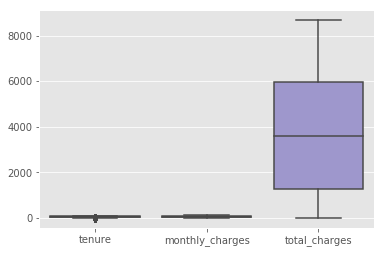

In [82]:
sns.boxplot(data=no_id_df) #what happened???

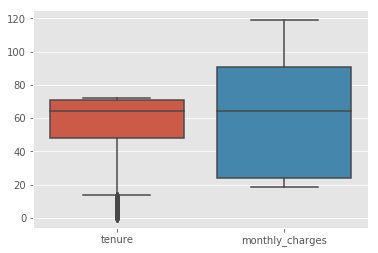

In [83]:
sns.boxplot(data=no_id_df.drop(columns=['total_charges']))

    o. Split your data into a test and train dataset. Set the random_state to 123. You should end up with 4 dataframes: X_train, X_test, y_train, y_test.

In [84]:
# test_train_split
# note capital X and lower case y...
# X contains all of the variables, x1, x2, x3,...xn
# whereas y is only y, the function

X = no_id_df[['tenure','monthly_charges']]
y = no_id_df[['total_charges']]

# note it's train_test_split, not test_train_split
# the more observations you have, the closer train_size gets to .5
# random_state sets the seed for the random number generator so that
# you can duplicate your results
# train_test_split returns four dataframes in order...

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=0)

# this returns four dataframes
# need to separate X and y for some uses, 
# but also need them in one datafram
# axis = 1 references columns
# axis = 0 would reference rows

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [85]:
if X_train.shape[0] == y_train.shape[0]:
    print("X & y train rows ARE equal")
else:
    print("X & y train rows ARE NOT equal")


if X_test.shape[0] == y_test.shape[0]:
    print("X & y test rows ARE equal")
else:
    print("X & y test rows ARE NOT equal")

if train.shape[1] == test.shape[1]:
    print("Number of columns in train & test ARE equal")
else:
    print("Number of columns in train & test ARE NOT equal")

train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print("Train Split: %.2f" % train_split)
print("Test Split: %.2f" % test_split)

X & y train rows ARE equal
X & y test rows ARE equal
Number of columns in train & test ARE equal
Train Split: 0.80
Test Split: 0.20


3. Using the in-sample data (X_train and y_train)

    a. Create a scatterplot for each combination of variables.

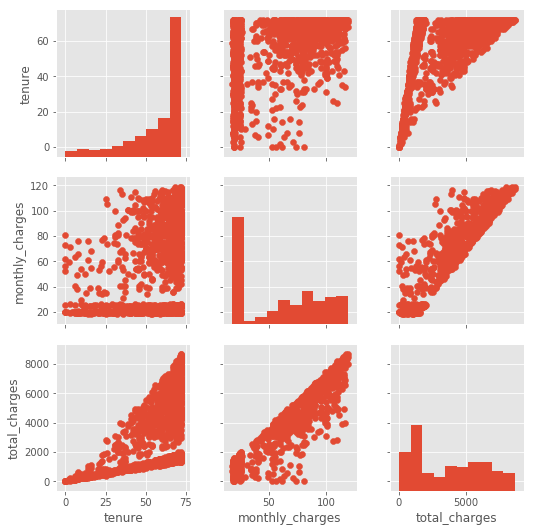

In [86]:
# This is roughly equivalent to sns.jointplot, but we see here that we have the
# flexibility to customize the type of the plots in each position.

g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


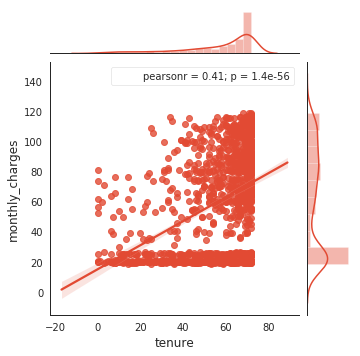

In [87]:
with sns.axes_style('white'):
    j = sns.jointplot("tenure", "monthly_charges", data=train, kind='reg', height=5);
    j.annotate(stats.pearsonr)
plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


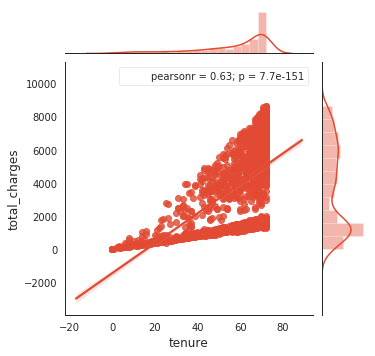

In [88]:
with sns.axes_style('white'):
    j = sns.jointplot("tenure", "total_charges", data=train, kind='reg', height=5);
    j.annotate(stats.pearsonr)
plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


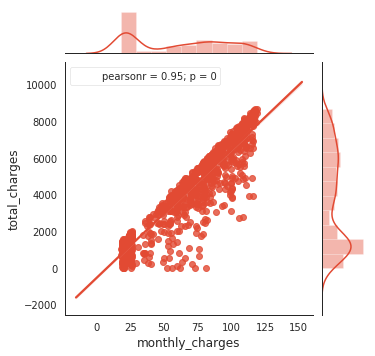

In [89]:
with sns.axes_style('white'):
    j = sns.jointplot("monthly_charges","total_charges", data=train, kind='reg', height=5);
    j.annotate(stats.pearsonr)
plt.show()

    b. Create a heatmap containing the 3 variables.

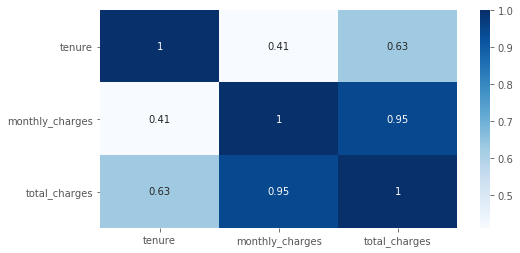

In [90]:
plt.figure(figsize=(8,4))
sns.heatmap(train.corr(), cmap='Blues', annot=True)

    c. Compute pearson's correlation coefficient and print it's value in the sentence "Pearson's R is ___ with a significance p-value of _"

Answer: 

For tenure and total_charges, Pearson's R is 0.62995 with a very small significance p-value of 7.7e-151.

For monthly_charges and total_charges, Pearson's R is 0.94557 with a significance p-value of 0. This indicates that using only monthly_charges and total_charges would not be interesting.

In [91]:
X_train.tenure.sum()

77237.0

In [92]:
y_train.total_charges.sum()

5002617.45

In [93]:
y_train.head(11)

,total_charges
1014,4819.75
801,4858.70
1677,916.00
1222,2460.15
1179,1734.65
22,6825.65
983,7853.70
45,973.35
619,561.15
378,278.85


In [94]:
pearsonr(X_train['tenure'], y_train.total_charges)

(0.6299521661541214, 7.748415018714848e-151)

In [95]:
X_train.dtypes

tenure             float64
monthly_charges    float64
dtype: object

In [96]:
y_train.dtypes

total_charges    float64
dtype: object

In [97]:
y_train[['total_charges']].sort_values(by=['total_charges'], ascending=False).head(11)

,total_charges
1271,8672.45
1649,8670.10
1657,8594.40
1504,8564.75
1679,8547.15
116,8543.25
1109,8529.50
1522,8477.60
717,8468.20
900,8443.70


In [98]:
X_train[['tenure']].sort_values(by=['tenure'], ascending=True).head(11)

,tenure
678,0.0
505,0.0
941,0.0
524,0.0
453,0.0
726,0.0
234,0.0
1293,0.0
416,0.0
188,1.0


In [99]:
[[column, pearsonr(train[column], train.total_charges)] for column in X_train] 

[['tenure', (0.6299521661541214, 7.748415018714848e-151)],
 ['monthly_charges', (0.9455657123170526, 0.0)]]

    d. Train (aka fit) a linear regression model, modeling total charges as a linear function of tenure.

In [100]:
# setting the fit_intercept to False makes the y-intercept zero... because you can't have
# negative charges, which you will if you don't do this.
lm1 = LinearRegression(fit_intercept=False)
print(lm1)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)


In [101]:
lm1.fit(X_train[['tenure']], y_train)
print(lm1)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)


    e. What is the y-intercept of the regression line? Translate the intercept in plain english, i.e. what is means in the context of the data.
    
Answer: the charges can't be below zero.

In [102]:
lm1_y_intercept = lm1.intercept_
print('y-intercept  (b): %.2f' % lm1_y_intercept)

y-intercept  (b): 0.00


    f. What is the slope of the regression line? Translate the slope in plain english, i.e. what is means in the context of the data.
    
Answer: the slope being 67 means the customer is charged 67 per month.

In [103]:
lm1_coefficients = lm1.coef_
print('coefficient (m): %.2f' % lm1_coefficients[0][0])

coefficient (m): 67.06


    g. Write the linear function in the form of y = mx + b using the parameters that were estimated from the algorithm and the variable names for y and x specific to your data.

total_charges = 67.05522532 * tenure + 0.0

    h. Test your model on the training sample. That is, use your newly fit model to predict the total charges using tenure.

In [104]:
X_train.head(3)

,tenure,monthly_charges
1014,62.0,79.95
801,70.0,68.95
1677,48.0,19.85


In [105]:
y_pred_lm1 = lm1.predict(X_train[['tenure']])

    i. Evaluate the model's performance using r-squared, mean squared error, and median absolute error.

In [106]:
print("lm1")

mse_lm1 = mean_squared_error(y_train, y_pred_lm1)
print("  The mean squared error is {:.3}, which means the error is very small".format(mse_lm1)) 

mae_lm1 = mean_absolute_error(y_train, y_pred_lm1)
print("  The mean absolute error is {:.3}, which means the difference between predicted total charges and the actual total charges is very small".format(mae_lm1)) 

r2_lm1 = r2_score(y_train, y_pred_lm1)
print('  {:.2%} of the variance in the client''s total_charges can be explained by his tenure.'.format(r2_lm1))

lm1
  The mean squared error is 4.15e+06, which means the error is very small
  The mean absolute error is 1.74e+03, which means the difference between predicted total charges and the actual total charges is very small
  36.82% of the variance in the clients total_charges can be explained by his tenure.


4. Using the out-of-sample data (X_test, y_test)

    a. Test your model on the test sample.

In [107]:
# Make predictions using the testing set
y_pred_lm1 = lm1.predict(X_test[['tenure']])

    b. Evaluate your model's performance on test sample. How do each of the metrics compare to that of the training sample? How can you explain the reason for the difference?

In [108]:
print("Using the test data on lm1:")

mse_lm1 = mean_squared_error(y_test, y_pred_lm1)
print("  The mean squared error is {:.3}, which means the error is very small".format(mse_lm1)) 

mae_lm1 = mean_absolute_error(y_test, y_pred_lm1)
print("  The mean absolute error is {:.3}, which means the difference between predicted total charges and the actual total charges is very small".format(mae_lm1)) 

r2_lm1 = r2_score(y_test, y_pred_lm1)
print("  {:.2%} of the variance in the client's total_charges can be explained by his tenure.".format(r2_lm1))

Using the test data on lm1:
  The mean squared error is 4.13e+06, which means the error is very small
  The mean absolute error is 1.73e+03, which means the difference between predicted total charges and the actual total charges is very small
  40.60% of the variance in the client's total_charges can be explained by his tenure.


Using the test data on lm1:
  The mean squared error is 4.13e+06, which means the error is very small
  The mean absolute error is 1.73e+03, which means the difference between predicted total charges and the actual total charges is very small
  40.60% of the variance in the client's total_charges can be explained by his tenure.
  That last is quite small, so there must be another variable influencing the total charges.

    c. Calculate the p-value of the regressor for the train and test sample. Hint: f_regression

In [109]:
print('Training data: ')
print('     ',f_regression(X_train, y_train, center=True))
print()
print('Test data: ')
print('     ',f_regression(X_test, y_test, center=True))

Training data: 
      (array([  890.84282376, 11430.98480739]), array([7.74841502e-151, 0.00000000e+000]))

Test data: 
      (array([ 258.78227155, 2082.00171213]), array([1.32010510e-043, 2.71091591e-146]))


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    d. Create a scatter plot of the predicted values versus the actual values in the test sample.

Text(0.5, 1.0, 'Predicted vs Actual Total Charges')

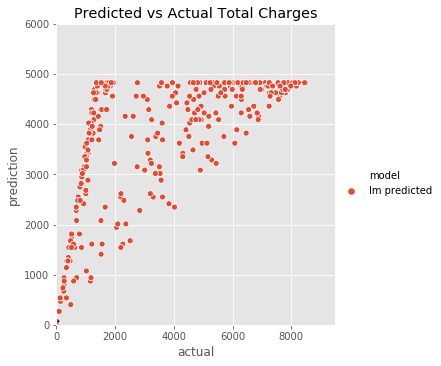

In [110]:
# the predictions are a matrix, but we want just
# a single array of predictions. We can use the .ravel method to achieve
# this.

pd.DataFrame({'actual': y_test.total_charges,
              'lm predicted': y_pred_lm1.ravel()})\
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')

plt.plot([60, 100], [60, 100], c='black', ls=':')
plt.ylim(0, 6000)
plt.xlim(0, 9500)
plt.title('Predicted vs Actual Total Charges')

    e. Create a scatter plot of the actual values of x and y in the test sample with the regression line layered over.

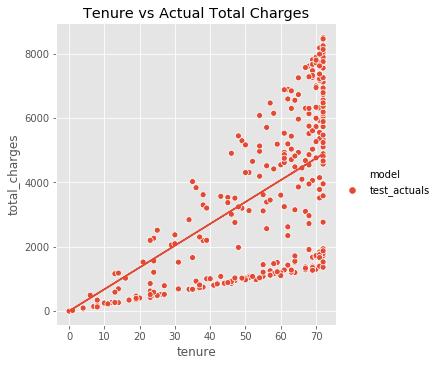

In [111]:
pd.DataFrame({'tenure' : X_test.tenure,
             'test_actuals' : y_test.total_charges})\
   .melt(id_vars=['tenure'], var_name='model', value_name='total_charges')\
   .pipe((sns.relplot, 'data'), x='tenure', y='total_charges', hue='model')
plt.plot
plt.title('Tenure vs Actual Total Charges')
x = X_test.tenure
y = y_test.total_charges
m = 67.8155
b = 0
plt.plot(x, m * x + b, '-')
plt.show()

    f. Create a scatter plot of the residuals (x axis: predicted values of final grade, y axis: the residual values (remember definition of residual from previous lesson). Layer over it a horizonal line that represents no residual.

Text(0, 0.5, 'Residuals')

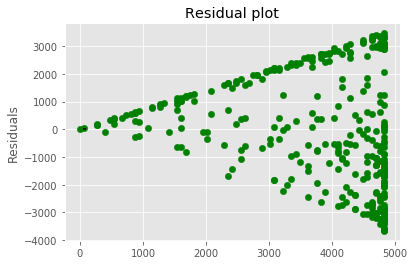

In [112]:
plt.scatter(y_pred_lm1, y_pred_lm1 - y_test, c='g', s=40)
plt.hlines(y=0, xmin=50, xmax=100)
plt.title("Residual plot")
plt.ylabel('Residuals')